# Import Libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    ElasticNet,
    SGDRegressor,
    RANSACRegressor
)

from sklearn.datasets import make_regression

from sklearn.metrics import (
    r2_score
)

# Data

In [75]:
d1_x, d1_y = make_regression(n_samples=200, n_features=1, 
                       n_informative=1, n_targets=1,noise=30.,random_state=42)

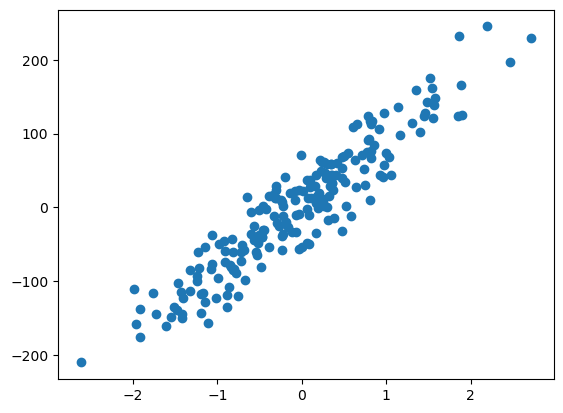

In [77]:
plt.scatter(d1_x,d1_y)
plt.show()

In [351]:
d2_x, d2_y = make_regression(n_samples=500, n_features=2, 
                       n_informative=2, n_targets=1,noise=100.,random_state=42)

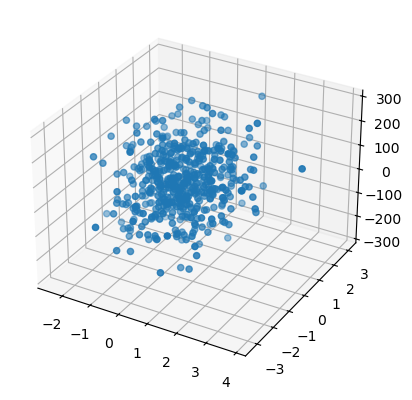

In [352]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(d2_x[:,0], d2_x[:,1], d2_y);

# Simple Linear Regression

In [85]:
# closed form solution

In [86]:
x_bar = np.mean(d1_x)
y_bar = np.mean(d1_y)

In [87]:
m = np.sum((d1_x.ravel()-x_bar) * (d1_y-y_bar)) / np.sum(np.square((d1_x.ravel()-x_bar)))

In [88]:
b = y_bar - m*x_bar

In [89]:
print(f'slope: {m:.3f}\nintercept: {b:.3f}')

slope: 86.625
intercept: 4.286


In [90]:
lr1 = LinearRegression()
lr1.fit(d1_x,d1_y)

LinearRegression()

In [91]:
lr1.coef_

array([86.62464521])

In [92]:
lr1.intercept_

4.2855417030635685

# Multiple Linear Regression

In [369]:
# closed form solution

In [101]:
design_matrix = np.hstack((np.ones_like(d1_x),d1_x))
target = d1_y.copy()

In [109]:
weights = np.linalg.inv(np.dot(design_matrix.T,design_matrix)).dot(design_matrix.T).dot(target)

In [110]:
weights

array([ 4.2855417 , 86.62464521])

In [111]:
w0 = weights[0]
w1 = weights[1]

In [353]:
design_matrix = np.hstack((np.ones(d2_x.shape[0]).reshape(-1,1),d2_x))
target = d2_y.copy()

In [354]:
weights = np.linalg.inv(np.dot(design_matrix.T,design_matrix)).dot(design_matrix.T).dot(target)

In [355]:
weights

array([10.63323615, 16.51246628, 17.54993123])

In [356]:
w0 = weights[0]
w1 = weights[1]
w2 = weights[2]

In [357]:
lr2 = LinearRegression()
lr2.fit(d2_x,d2_y)

LinearRegression()

In [358]:
lr2.intercept_

10.633236149386857

In [359]:
lr2.coef_

array([16.51246628, 17.54993123])

In [363]:
xx, yy = np.meshgrid(np.linspace(-5,5),np.linspace(-5,5))
zz = lr2.predict(np.hstack((xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1))))

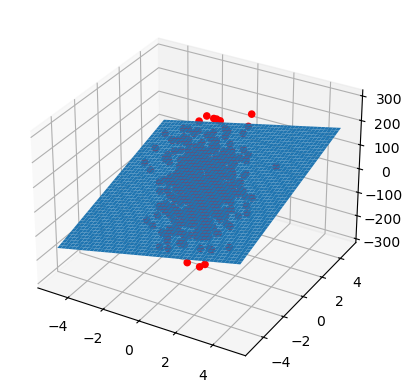

In [364]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(d2_x[:,0], d2_x[:,1], d2_y,c='r',alpha=1)
ax.plot_surface(xx,yy,zz.reshape(50,50))
plt.show()